# Dimentionality Reduction and Clustering

## Dimentionality Reduction

In the field of machine learning, it is useful to apply a process called dimensionality reduction to highly dimensional data. The purpose of this process is to reduce the number of features under consideration, where each feature is a dimension that partly represents the objects.

Why is dimensionality reduction important? As more features are added, the data becomes very sparse and analysis suffers from the curse of dimensionality. Additionally, it is easier to process smaller data sets.

Dimensionality reduction can be executed using two different methods:
- Selecting from the existing features (feature selection)
- Extracting new features by combining the existing features (feature extraction)

The main technique for feature extraction is the Principle Component Analysis (PCA). PCA guarantees finding the best linear transformation that reduces the number of dimensions with a minimum loss of information. Sometimes the information that was lost is regarded as noise – information that does not represent the phenomena we are trying to model, but is rather a side effect of some usually unknown processes. PCA process can be visualized as below, 

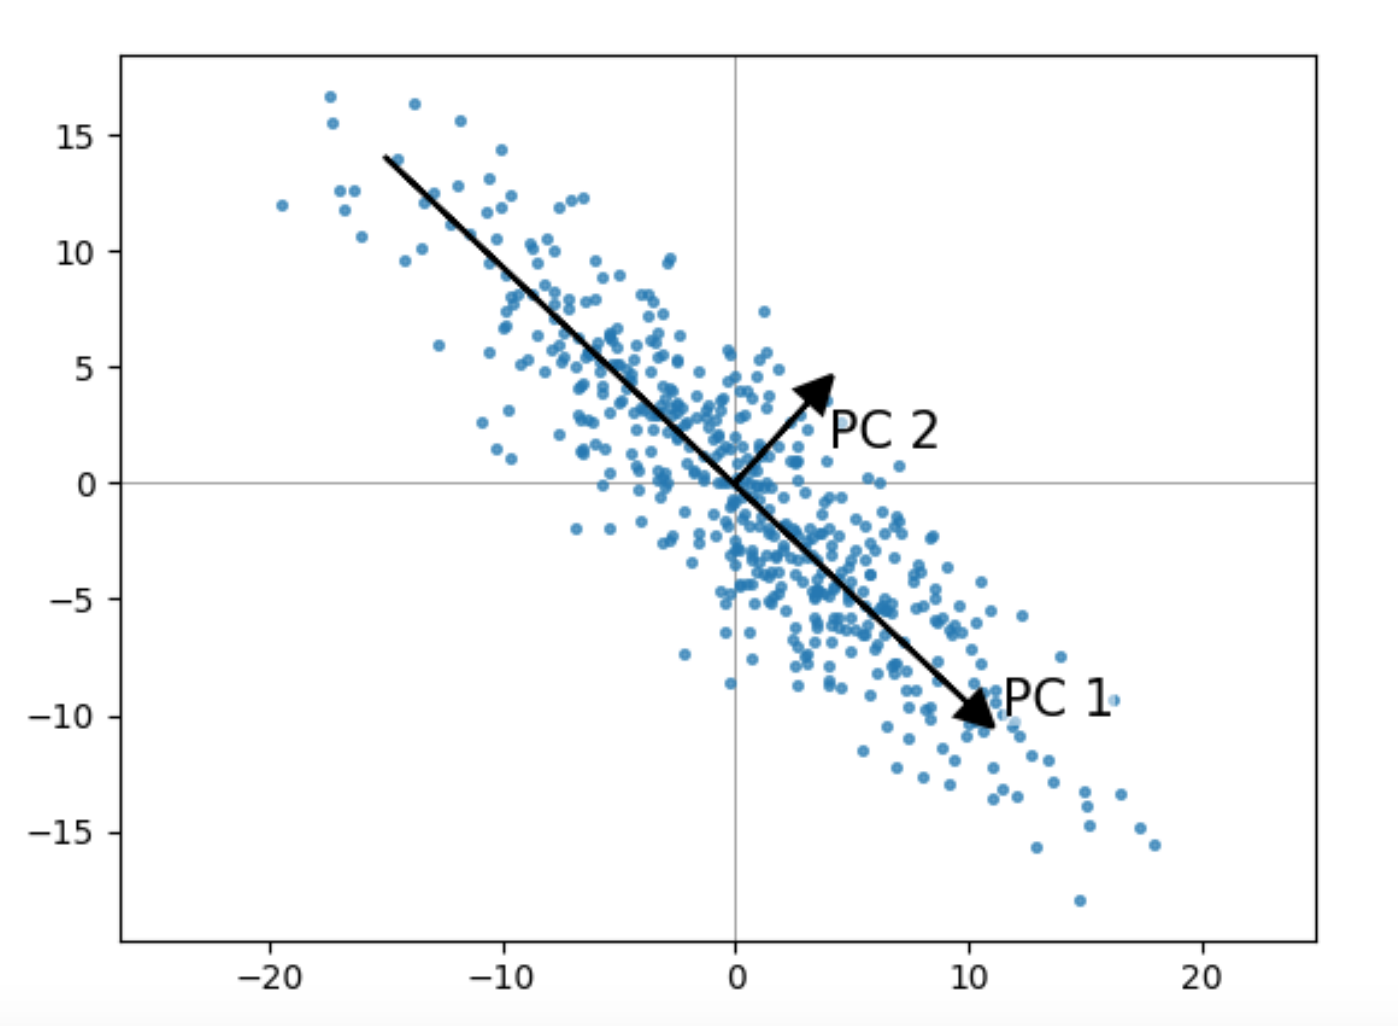

In [43]:
from IPython.display import Image
Image(filename='images/1.png', width=400, height=400)

Following the process in the example, we might be content with just PC1 – one feature instead of originally two.

## Clustering

**Clustering** is the assignment of objects to homogeneous groups (called clusters) while making sure that objects in different groups are not similar. Clustering is considered an unsupervised task as it aims to describe the hidden structure of the objects.
Each object is described by a set of characters called features. The first step of dividing objects into clusters is to define the distance between the different objects. Defining an adequate distance measure is crucial for the success of the clustering process.

There are many clustering algorithms, each has its advantages and disadvantages.Two among them are K-means and Optics.

**k-means**
A popular algorithm for clustering is k-means, which aims to identify the best k cluster centers in an iterative manner. Cluster centers are served as “representative” of the objects associated with the cluster. k-means’ key features are also its drawbacks:

The number of clusters (k) must be given explicitly. In some cases, the number of different groups is unknown.
- k-means iterative nature might lead to an incorrect result due to convergence to a local minimum.
- The clusters are assumed to be spherical.
Despite these drawbacks, k-means remains the right and popular choice in many cases. An example for clustering using k-means on spherical data can be seen as below,

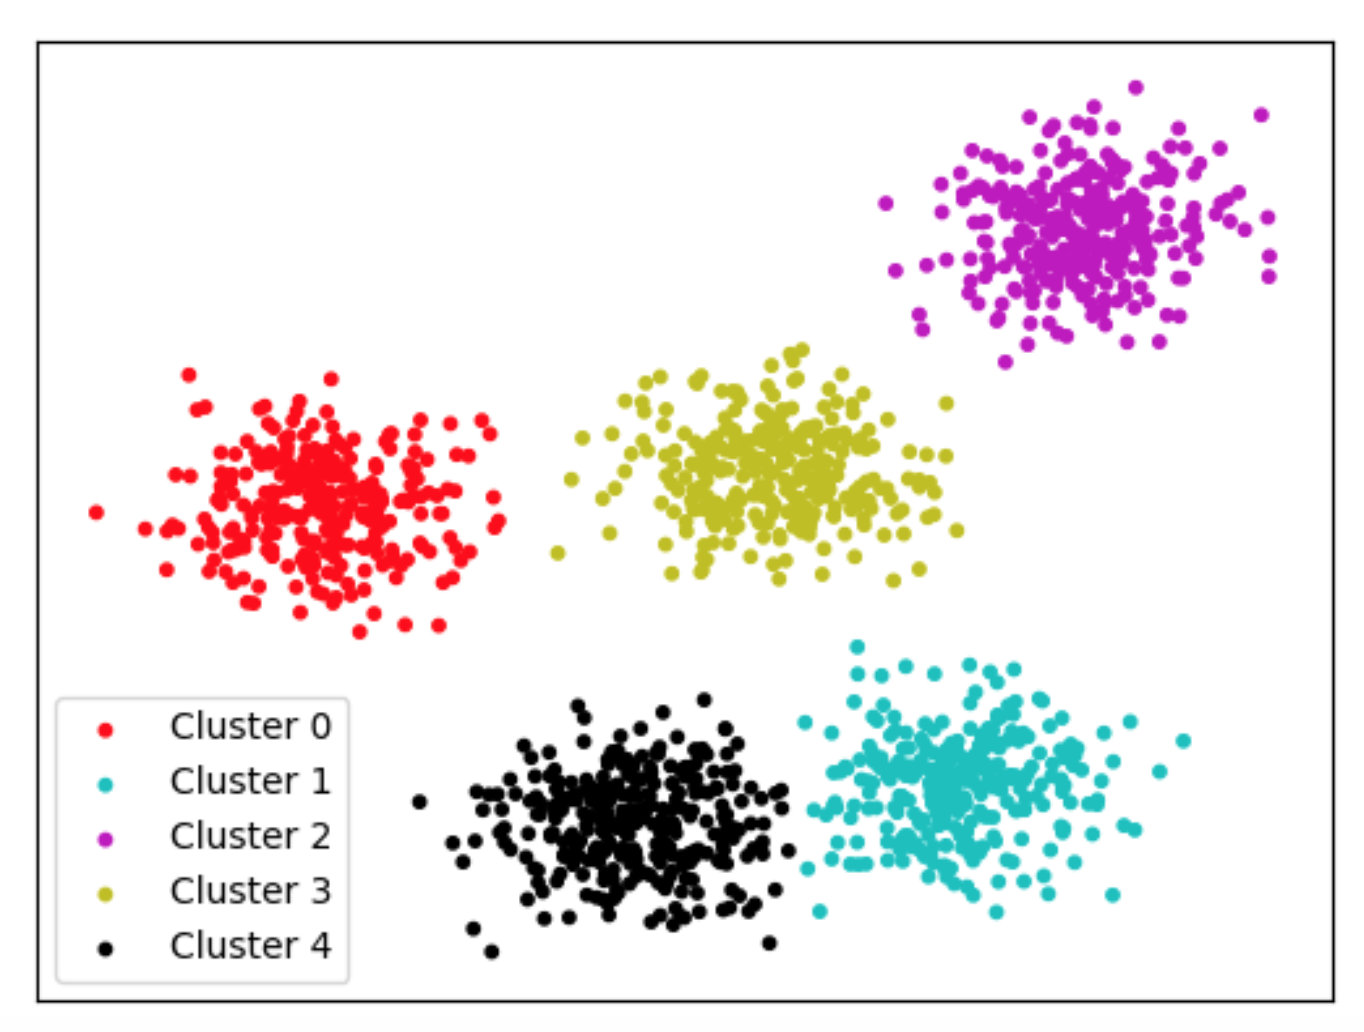

In [44]:
from IPython.display import Image
Image(filename='images/2.png', width=400, height=400)

**OPTICS**

A different clustering algorithm is OPTICS, which is a density-based clustering algorithm. Density-based clustering, unlike centroid-based clustering, works by identifying “dense” clusters of points, allowing it to learn clusters of arbitrary shape and densities. OPTICS can also identify outliers (noise) in the data by identifying scattered objects.

The OPTICS approach yields a very different grouping of data points than k-means; it classifies outliers and more accurately represents clusters that are by nature not spherical.An example of running k-means versus OPTICS on moon-like data is presented as below,

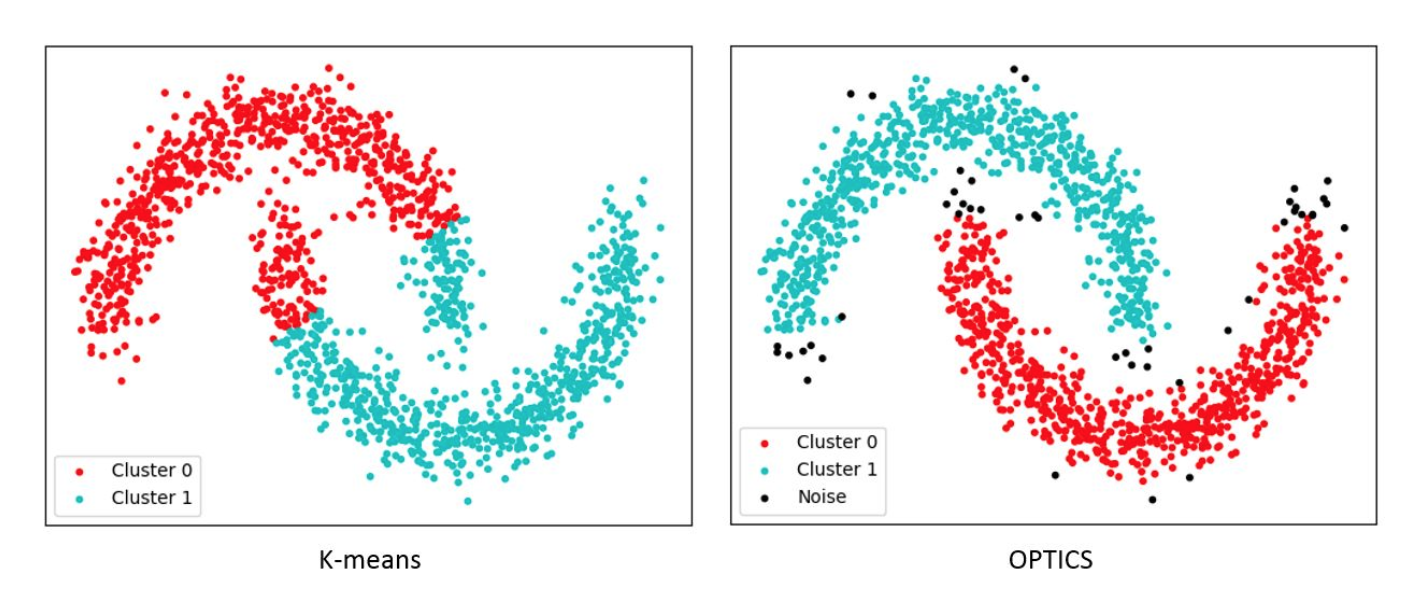

In [45]:
from IPython.display import Image
Image(filename='images/3.png', width=400, height=400)

## Implementation

In [1]:
# Importing necessary libraries and helper functions

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

#### Loading and preparing Data

Dataset from https://archive.ics.uci.edu/ml/datasets/seeds

In [2]:

colorsRange = ['r','g','b']

def transform(color, label):
    c = [];
    for l in label:
        c.append(color[l])
    return c


def plot_clustering(X, labels, color):
    c = transform(color, labels)
    plt.scatter(X[:,0], X[:,1],c=c)

In [3]:
# reading data
dataframe = pd.read_csv('seed.txt',sep='\t')
dataframe.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "y"]

# examples without class
dfx = dataframe.drop('y',axis=1)
X = dfx.values

# examples with classes
y = dataframe['y']
y = y - 1

### Dimensionality reduction: sklearn PCA

**Principal component analysis** is a fast and flexible unsupervised method for dimensionality reduction in data. Its behavior is easiest to visualize by looking at a two-dimensional dataset. 

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

In [19]:
# The transformed data has been reduced to a single dimension.

pca = PCA(n_components=2)
pca.fit(X)
X2d = pca.transform(X)

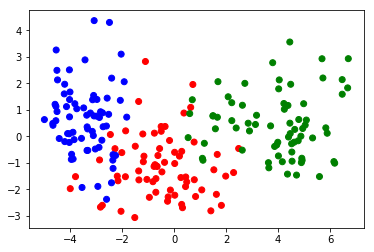

In [5]:
# Plotting reduced dataset with class colors

plot_clustering(X2d, y, colorsRange)

### Hierarhical with sklearn Agglomerative Clustering

Agglomerative Clustering recursively merges the pair of clusters that minimally increases a given linkage distance.

Hierarchical clustering algorithms are either top-down or bottom-up. Bottom-up algorithms treat each document as a singleton cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all documents. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC . Top-down clustering requires a method for splitting a cluster. It proceeds by splitting clusters recursively until individual documents are reached. 

The results of hierarchical clustering are usually presented in a **dendrogram.**

The standard algorithm for hierarchical agglomerative clustering (HAC) has a time complexity of O(n^3) and requires O(n^2) memory, which makes it too slow for even medium data sets. 
However, for some special cases, optimal efficient agglomerative methods (of complexity O(n^2)) are known: SLINK for single-linkage and CLINK for complete-linkage clustering. With a heap the runtime of the general case can be reduced to O(n^2 log n) at the cost of further increasing the memory requirements. In many programming languages, the memory overheads of this approach are too large to make it practically usable.

Except for the special case of single-linkage, none of the algorithms (except exhaustive search in O(2^n)) can be guaranteed to find the optimum solution.

Divisive clustering with an exhaustive search is O(2^n), but it is common to use faster heuristics to choose splits, such as k-means.



### Reduced dataset

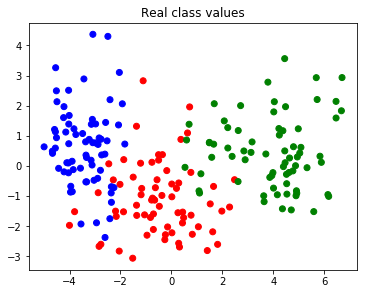

In [21]:
# Plotting real class values
plt.figure(figsize=(20,10))
plt.subplot(232), plt.title('Real class values')
plot_clustering(X2d, y, colorsRange)

**Ward Linkage:** Ward's method minimizes the variance of the clusters being merged.

In [38]:
# Original Dataset
acw = AgglomerativeClustering(n_clusters=3, linkage='ward')
acw.fit(X)
print('Original dataset')
print('Ward linkage rand index:', adjusted_rand_score(y, acw.labels_))

# Reduced Dataset
acw = AgglomerativeClustering(n_clusters=3, linkage='ward')
acw.fit(X2d)
print('\nReduced dataset')
print('Ward linkage rand index:', adjusted_rand_score(y, acw.labels_))

Original dataset
('Ward linkage rand index:', 0.7128811606120116)

Reduced dataset
('Ward linkage rand index:', 0.5757303049502391)


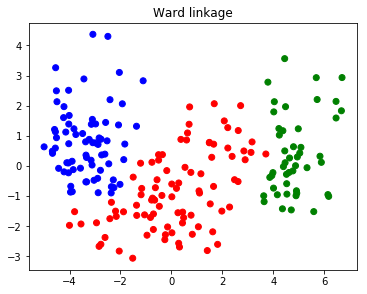

In [24]:
plt.figure(figsize=(20,10))
plt.subplot(234), plt.title('Ward linkage')
plot_clustering(X2d, acw.labels_, colorsRange)

**Complete Linkage:** Complete or maximum linkage uses the maximum distances between all observations of the two sets.

In [39]:
# Original Dataset
acm = AgglomerativeClustering(n_clusters=3, linkage='complete')
acm.fit(X)
print('Original dataset')
print('complete linkage rand index:', adjusted_rand_score(y, acm.labels_))

# Reduced Dataset
acm = AgglomerativeClustering(n_clusters=3, linkage='complete')
acm.fit(X2d)
print('\nReduced dataset')
print('complete linkage rand index:', adjusted_rand_score(y, acm.labels_))

Original dataset
('complete linkage rand index:', 0.5459581764369682)

Reduced dataset
('complete linkage rand index:', 0.496683098426763)


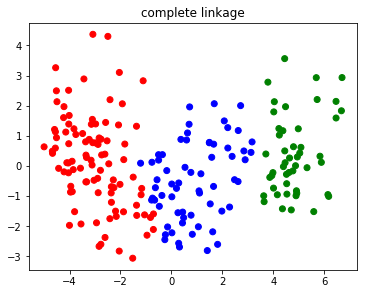

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(235), plt.title('complete linkage')
plot_clustering(X2d, acm.labels_, colorsRange)

**Average Linkage:** Average uses the average of the distances of each observation of the two sets.

In [40]:
# Original Dataset
aca = AgglomerativeClustering(n_clusters=3, linkage='average')
aca.fit(X)
print('Original dataset')
print('average linkage rand index:', adjusted_rand_score(y, aca.labels_))

# Reduced Dataset
aca = AgglomerativeClustering(n_clusters=3, linkage='average')
aca.fit(X2d)
print('\nReduced dataset')
print('average linkage rand index:', adjusted_rand_score(y, aca.labels_))

Original dataset
('average linkage rand index:', 0.7435939174971216)

Reduced dataset
('average linkage rand index:', 0.7241328890436166)


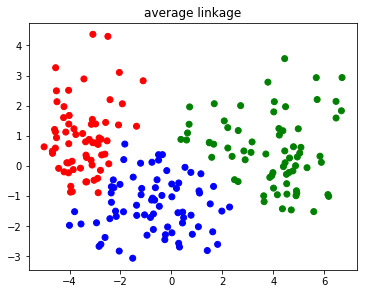

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(236), plt.title('average linkage')
plot_clustering(X2d, aca.labels_, colorsRange)

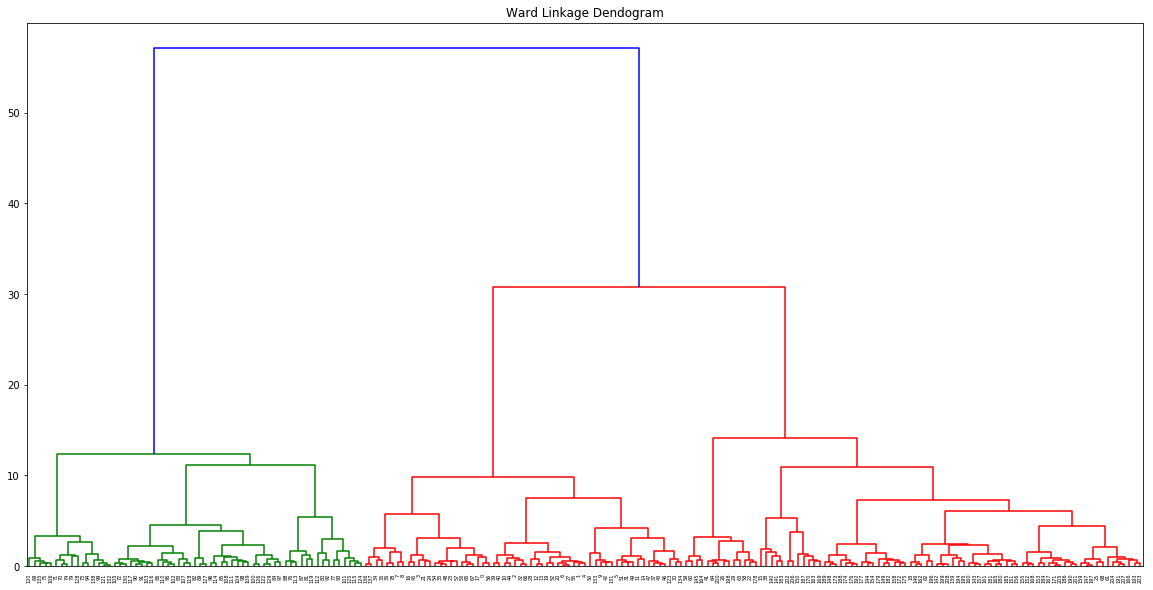

In [34]:
# ward linkage - dendogram
zw = hierarchy.linkage(X,'ward')
plt.figure(figsize=(20,10))
plt.title('Ward Linkage Dendogram')
_ = hierarchy.dendrogram(zw)

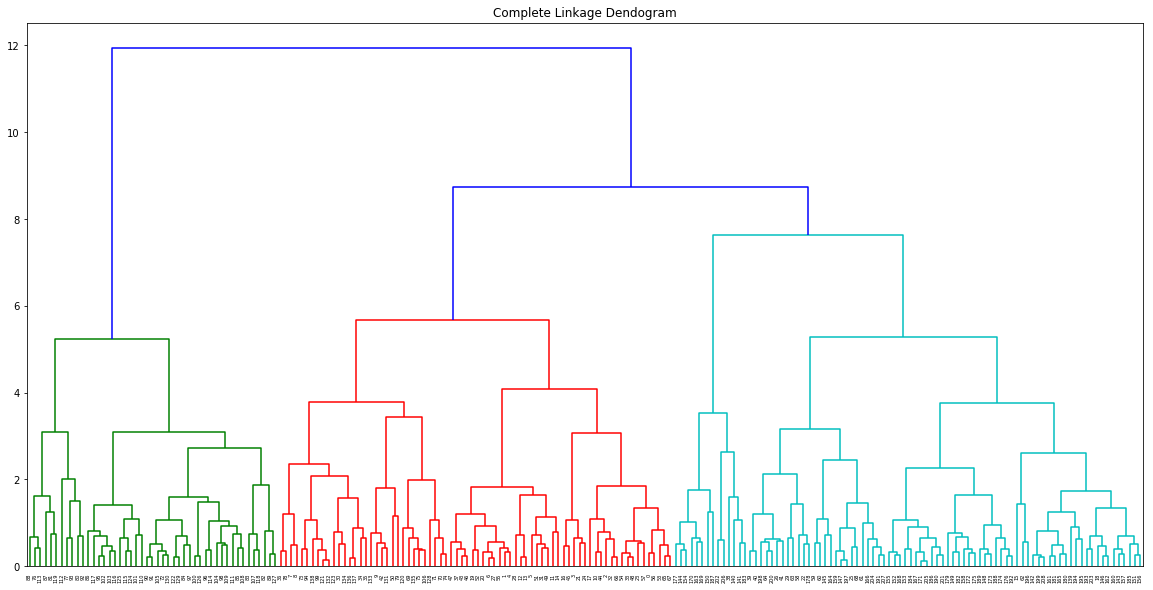

In [33]:
# complete linkage - dendogram
zc = hierarchy.linkage(X, 'complete')
plt.figure(figsize=(20,10))
plt.title('Complete Linkage Dendogram')
_ = hierarchy.dendrogram(zc)

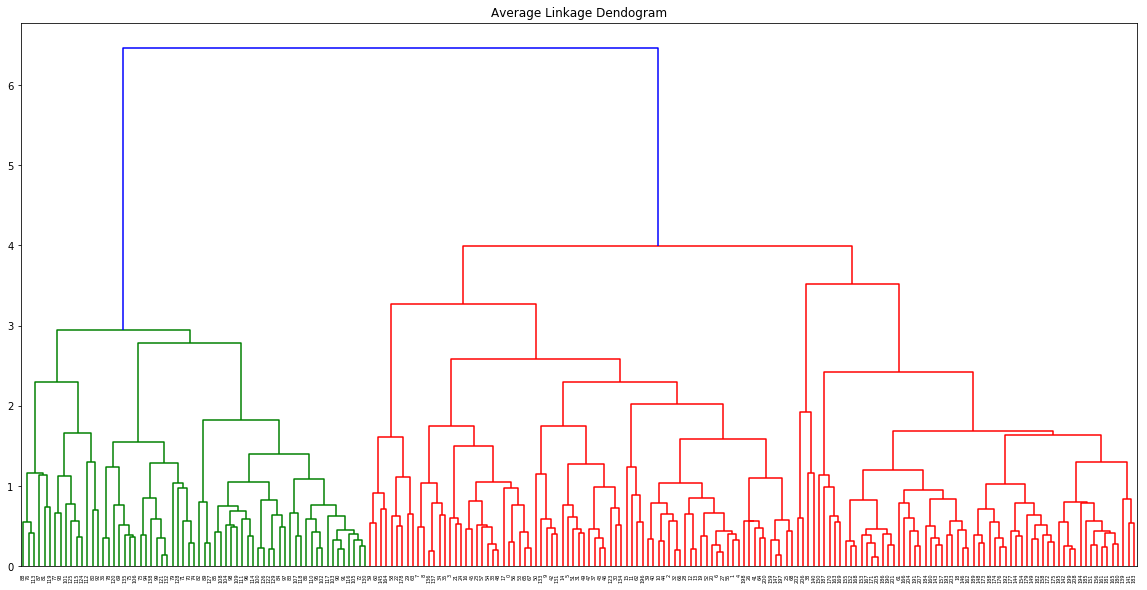

In [41]:
# average linkage - dendogram
za = hierarchy.linkage(X, 'average')
plt.figure(figsize=(20,10))
plt.title('Average Linkage Dendogram')
dn = hierarchy.dendrogram(za)

**References:**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://github.com/lorentzo/DS-LAB2-DIM_RED-CLUSTERING/blob/master/lab2.ipynb

https://www.imperva.com/blog/clustering-and-dimensionality-reduction-understanding-the-magic-behind-machine-learning/
